In [1]:
import numpy as np #linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day25-normalization/wine_data.csv'
df = pd.read_csv(url,header = None, usecols = [0,1,2])
df.columns = ['Class label','Alcohol','Malic acid']

In [3]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

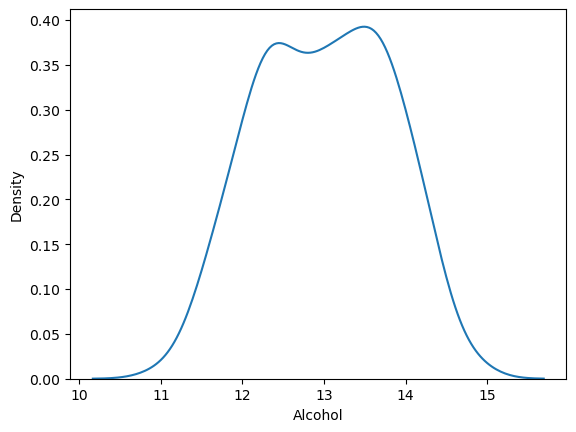

In [4]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

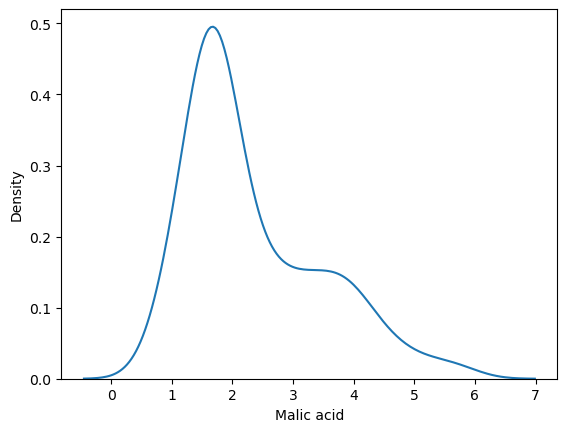

In [5]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

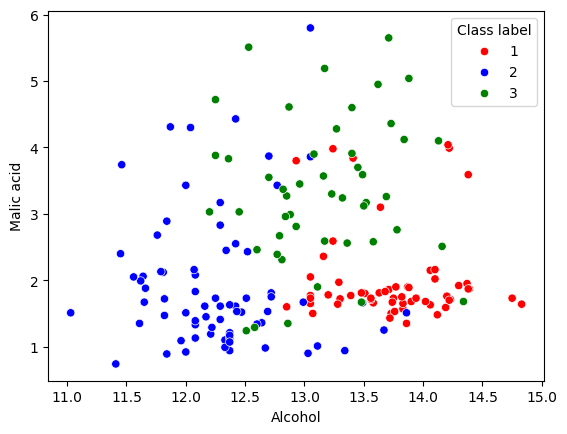

In [7]:
color_dict = {1 : 'red',3 : 'green',2 : 'blue'}
sns.scatterplot(x = df['Alcohol'],y=df['Malic acid'],hue = df['Class label'],palette = color_dict)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Class label',axis =1),df['Class label'],test_size = 0.3, random_state = 0)
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

#transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

#Learns the minimum and maximum of each feature.

In [13]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns)

In [16]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [17]:
np.round(x_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


min value after the MinMaxScaler becomes 0 and max becomes 1
hence the range of the new x parameters lies from 0 and 1

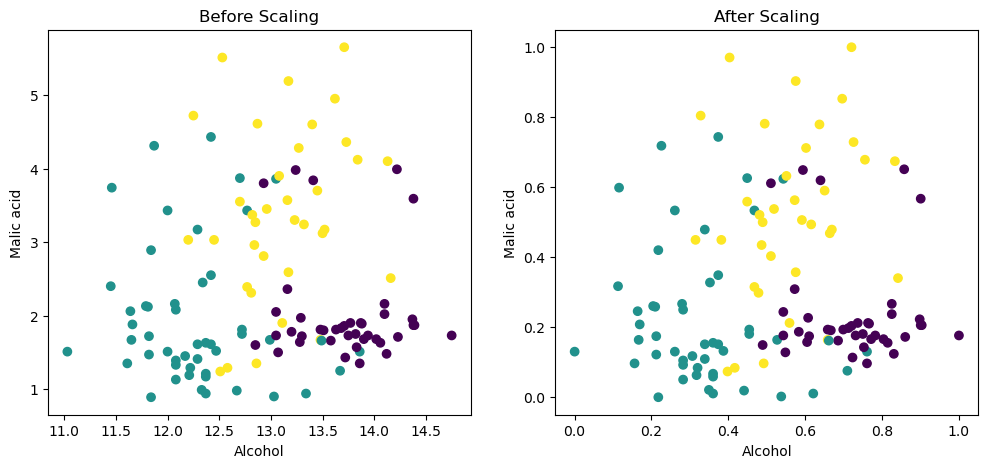

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,5))
color_dict = {1 : 'red',3 : 'green',2 : 'blue'}
ax1.scatter(x_train['Alcohol'],x_train['Malic acid'],c=y_train)
ax1.set_title('Before Scaling')

ax1.set_xlabel("Alcohol")
ax1.set_ylabel("Malic acid")

ax2.scatter(x_train_scaled['Alcohol'],x_train_scaled['Malic acid'],c=y_train)
ax2.set_title('After Scaling')

ax2.set_xlabel("Alcohol")
ax2.set_ylabel("Malic acid")

plt.show()

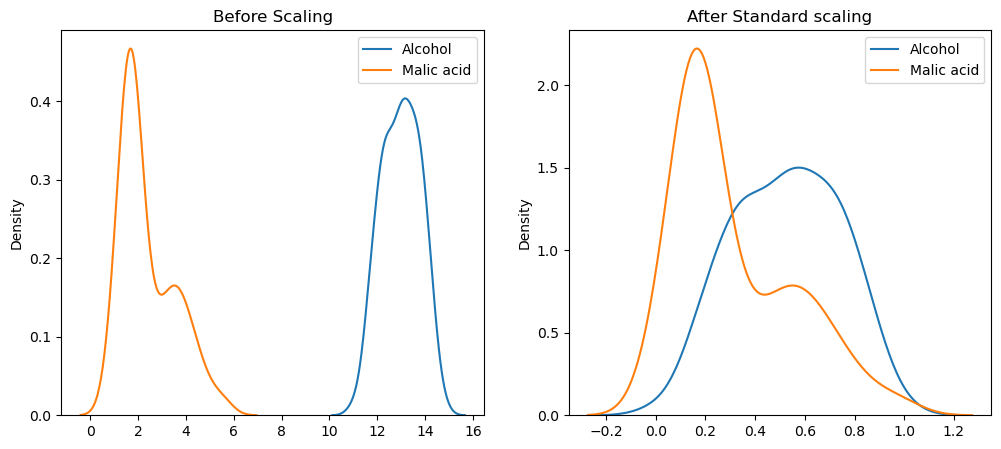

In [33]:
fig, (ax1, ax2)= plt.subplots(ncols = 2, figsize = (12,5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'],ax = ax1, label = 'Alcohol')
sns.kdeplot(x_train['Malic acid'],ax = ax1, label = 'Malic acid')
ax1.legend()

#after scaling
ax2.set_title('After Standard scaling')
sns.kdeplot(x_train_scaled['Alcohol'],ax= ax2, label = 'Alcohol')
sns.kdeplot(x_train_scaled['Malic acid'],ax =ax2, label = 'Malic acid')
ax2.legend()

ax1.set_xlabel("")
ax2.set_xlabel("")

plt.show()

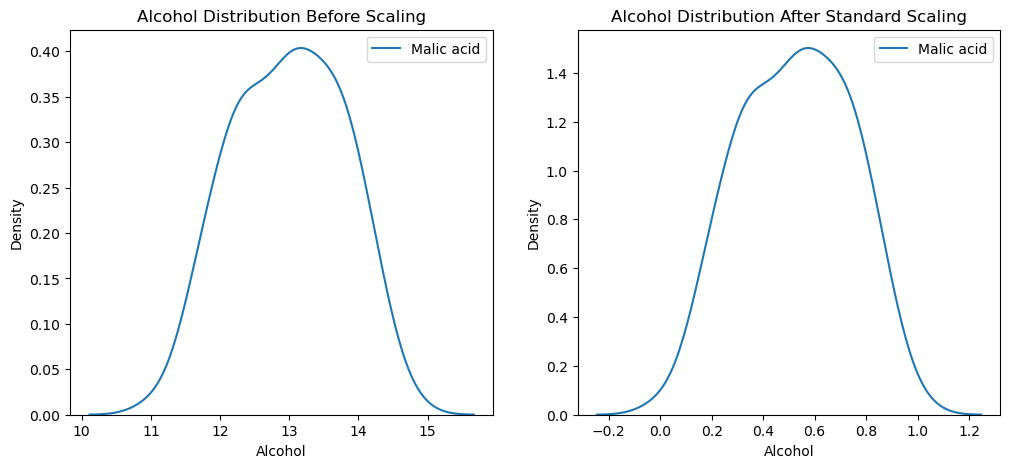

In [36]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

#before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['Alcohol'],ax=ax1,label = "Alcohol")
ax1.legend()

#after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'],ax=ax2,label = 'Alcohol')
ax2.legend()

plt.show()

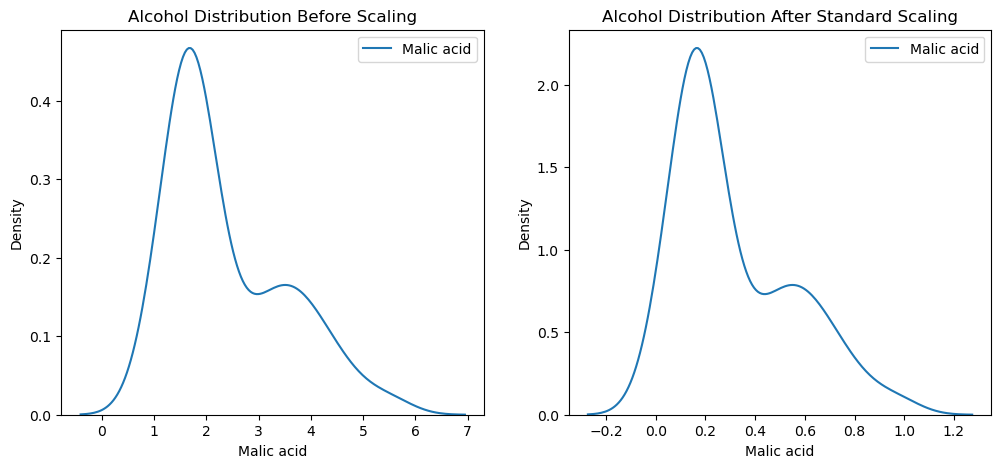

In [37]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

#before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(x_train['Malic acid'],ax=ax1,label = "Malic acid")
ax1.legend()

#after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Malic acid'],ax=ax2,label = 'Malic acid')
ax2.legend()

plt.show()